In [1]:
from street_signs_identify.detector.fr_detector import FRDetector
from street_signs_identify.detector.craft_detector import CRAFTDetector

In [2]:
model_path = "./street_signs_identify/detector/saved_models/frcnn.pth"
fr_detector = FRDetector(model_ckpt=model_path)

In [3]:
craft_detector = CRAFTDetector()

In [4]:
import numpy as np
from PIL import Image, ImageOps
img_path = "./street_signs_identify/all_data/220707_023452647_Camera_4.jpg"
image = Image.open(img_path).convert("RGB")
image = ImageOps.exif_transpose(image)
image = np.array(image)

In [5]:
fr_detected_image = fr_detector(image)

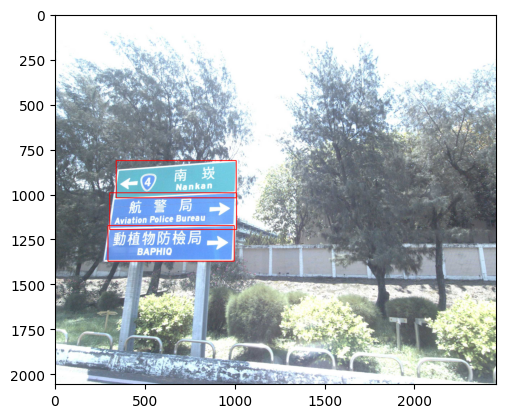

In [6]:
import matplotlib.pyplot as plt
plt.imshow(fr_detected_image.draw_all_box())

In [7]:
instance_0, instance_1, instance_2 = fr_detected_image

In [8]:
from street_signs_identify.recognizer.ocr_recognizer import EasyOCRRecognizer

model_ckpt = "./street_signs_identify/recognizer/saved_models/epoch_6701.pth"
recognizer = EasyOCRRecognizer(model_ckpt)
en_recognizer = EasyOCRRecognizer(lang_list=["en"])

    label score   x0   y0   x1   y1
0  h_list   1.0   16   13  529  125
1  h_list   1.0  157  115  365  175


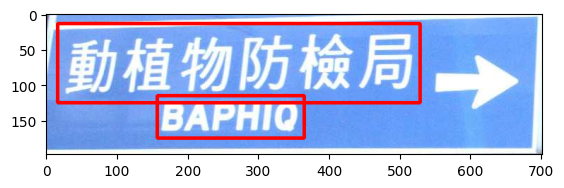

In [9]:
craft_detected_image = craft_detector(instance_0.image)
plt.imshow(craft_detected_image.draw_all_box())
print(craft_detected_image.info)

In [10]:
results_ch = recognizer(*craft_detected_image)
results_en = en_recognizer(*craft_detected_image)
for r_ch, r_en in zip(results_ch, results_en):
    print("ch_mod", r_ch.info, r_ch.score)
    print("en_mod", r_en.info, r_en.score)
    print()


ch_mod 動植物防檢局 0.9998833923671427
en_mod @wMTRR 0.10009684226163217
ch_mod 關 0.2656786261678121
en_mod BAPHIQ 0.9562252784276484


    label score  x0   y0   x1   y1
0  h_list   1.0  94   19  499  127
1  h_list   1.0  20  114  540  186


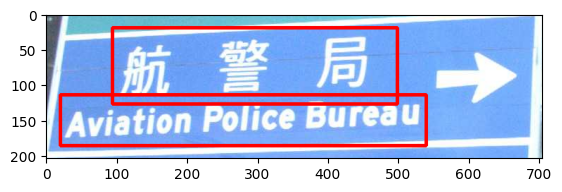

In [11]:
craft_detected_image = craft_detector(instance_1.image)
plt.imshow(craft_detected_image.draw_all_box())
print(craft_detected_image.info)

In [12]:
results_ch = recognizer(*craft_detected_image)
results_en = en_recognizer(*craft_detected_image)
for r_ch, r_en in zip(results_ch, results_en):
    print("ch_mod", r_ch.info, r_ch.score)
    print("en_mod", r_en.info, r_en.score)
    print()

ch_mod 航警局 0.9997423217185597
en_mod M 3 R 0.310760486403577
ch_mod 台 0.034253450575816524
en_mod Aviation Police Bureau 0.8101650599881043


    label score   x0   y0   x1   y1
0  h_list   1.0  155   91  197  147
1  h_list   1.0  309   20  564  134
2  h_list   1.0  323  109  542  176


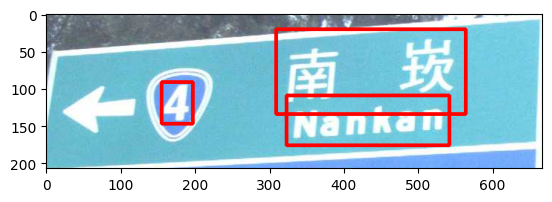

In [13]:
craft_detected_image = craft_detector(instance_2.image)
plt.imshow(craft_detected_image.draw_all_box())
print(craft_detected_image.info)

In [14]:
results_ch = recognizer(*craft_detected_image)
results_en = en_recognizer(*craft_detected_image)
for r_ch, r_en in zip(results_ch, results_en):
    print("ch_mod", r_ch.info, r_ch.score)
    print("en_mod", r_en.info, r_en.score)
    print()

ch_mod  0.0
en_mod 4 0.9999992847443906
ch_mod 南崁 0.9999608879486127
en_mod 7J  # 0.12667268417123484
ch_mod  0.0
en_mod Nankan 0.9999916292700755
